In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

In [3]:
df=pd.read_csv('../data/cleaned_superstore.csv')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date']) 
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [6]:
#preparing dataset for prophet
monthly_sales=df.resample('MS', on='Order Date').sum(numeric_only=True)[['Sales']].reset_index()
#ms- month start(One row per month)
#sum - sum of all the data each month
#sales - Only sales column is picked
#reset index= add index number

In [7]:
monthly_sales=monthly_sales.rename(columns={'Order Date':'ds', 'Sales':'y'}) #ds=date, y=target value(sales)
monthly_sales

,ds,y
0,2014-01-01,14236.8950
1,2014-02-01,4519.8920
2,2014-03-01,55691.0090
3,2014-04-01,28295.3450
4,2014-05-01,23648.2870
5,2014-06-01,34595.1276
6,2014-07-01,33946.3930
7,2014-08-01,27909.4685
8,2014-09-01,81777.3508
9,2014-10-01,31453.3930


In [8]:
model=Prophet()
model.fit(monthly_sales)

21:12:29 - cmdstanpy - INFO - Chain [1] start processing
21:12:29 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future=model.make_future_dataframe(periods=12, freq='MS')

In [10]:
forecast=model.predict(future)

In [11]:
forecast[['ds', 'yhat','yhat_lower', 'yhat_upper']].tail(12)
#ds – The date (stands for “datestamp”)
#yhat – The predicted value of sales (this is your forecast!)
#yhat_lower – Lower end of the confidence interval 
#yhat_upper – Upper end of the confidence interval 

,ds,yhat,yhat_lower,yhat_upper
48,2018-01-01,45772.718507,37131.587702,54097.127756
49,2018-02-01,32975.310990,24225.675732,42215.323886
50,2018-03-01,72181.433236,62452.497689,80310.439131
51,2018-04-01,56487.009400,47970.537606,65249.319654
52,2018-05-01,57101.204855,48400.440742,66135.346526
53,2018-06-01,58654.778084,50050.891923,67175.069859
54,2018-07-01,58839.694912,50277.243509,67146.527564
55,2018-08-01,63583.293670,55164.229130,71824.220548
56,2018-09-01,100602.629957,91831.646901,108993.194260
57,2018-10-01,69219.824436,60481.219810,78199.676381


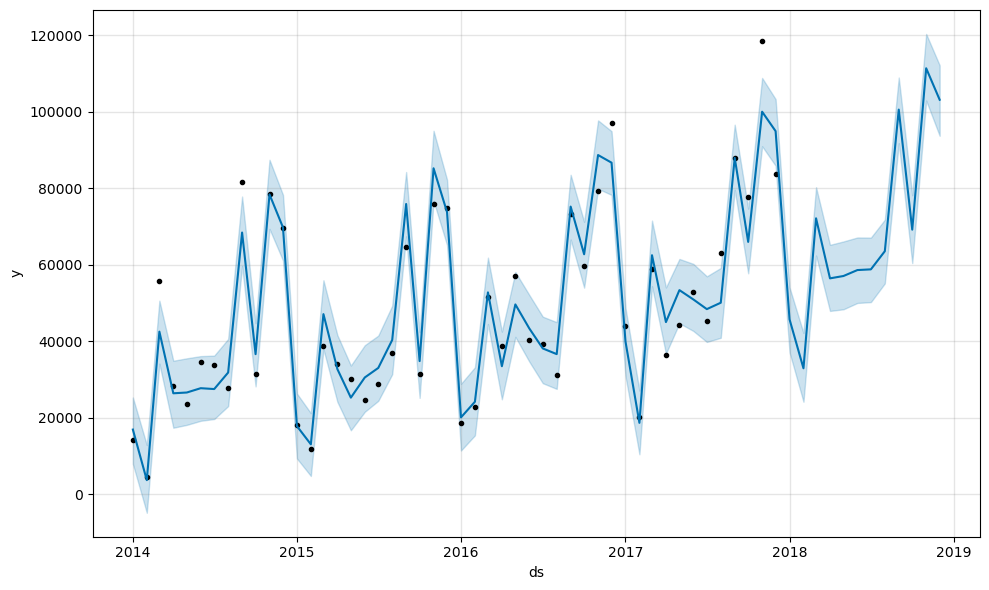

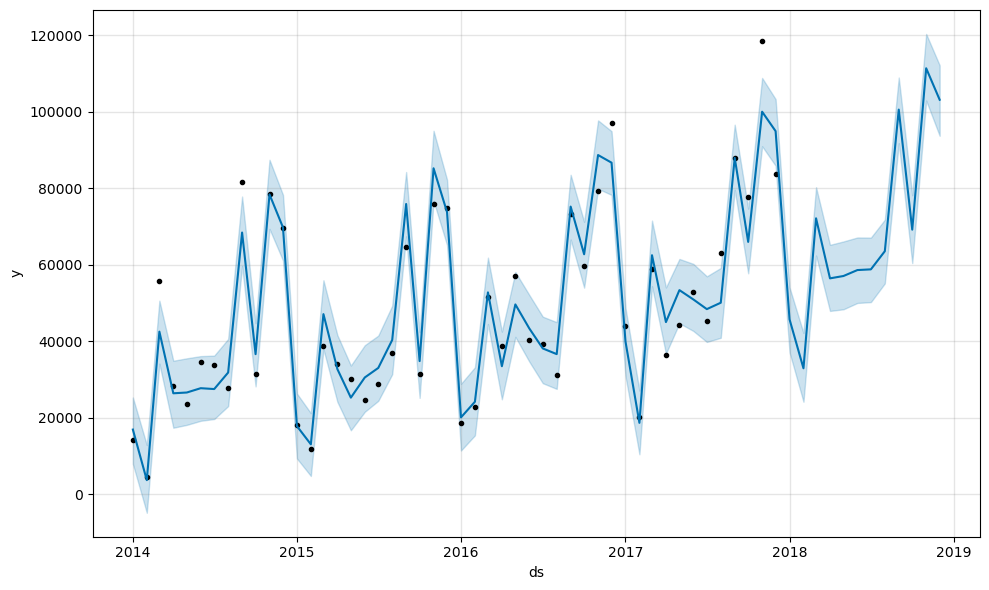

In [12]:
model.plot(forecast)

In [13]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,39298.974722,7975.393825,25342.876394,39298.974722,39298.974722,-22342.884298,-22342.884298,-22342.884298,-22342.884298,-22342.884298,-22342.884298,0.0,0.0,0.0,16956.090424
1,2014-02-01,39671.758107,-4797.762542,12914.239846,39671.758107,39671.758107,-35937.127846,-35937.127846,-35937.127846,-35937.127846,-35937.127846,-35937.127846,0.0,0.0,0.0,3734.630261
2,2014-03-01,40008.465680,34192.187907,50654.638825,40008.465680,40008.465680,2549.271534,2549.271534,2549.271534,2549.271534,2549.271534,2549.271534,0.0,0.0,0.0,42557.737214
3,2014-04-01,40381.249064,17433.285488,34947.501705,40381.249064,40381.249064,-13941.988333,-13941.988333,-13941.988333,-13941.988333,-13941.988333,-13941.988333,0.0,0.0,0.0,26439.260731
4,2014-05-01,40742.007178,18180.866508,35581.544828,40742.007178,40742.007178,-14098.924521,-14098.924521,-14098.924521,-14098.924521,-14098.924521,-14098.924521,0.0,0.0,0.0,26643.082657
5,2014-06-01,41114.790562,19250.596947,36161.276661,41114.790562,41114.790562,-13342.187323,-13342.187323,-13342.187323,-13342.187323,-13342.187323,-13342.187323,0.0,0.0,0.0,27772.603239
6,2014-07-01,41475.548676,19714.287670,36286.335277,41475.548676,41475.548676,-13928.402137,-13928.402137,-13928.402137,-13928.402137,-13928.402137,-13928.402137,0.0,0.0,0.0,27547.146539
7,2014-08-01,41848.332061,23090.851855,40644.757217,41848.332061,41848.332061,-9981.639411,-9981.639411,-9981.639411,-9981.639411,-9981.639411,-9981.639411,0.0,0.0,0.0,31866.692650
8,2014-09-01,42221.115445,59716.154231,77875.123547,42221.115445,42221.115445,26240.860846,26240.860846,26240.860846,26240.860846,26240.860846,26240.860846,0.0,0.0,0.0,68461.976291
9,2014-10-01,42581.873559,28242.000755,44770.872132,42581.873559,42581.873559,-5913.076318,-5913.076318,-5913.076318,-5913.076318,-5913.076318,-5913.076318,0.0,0.0,0.0,36668.797241


In [14]:
forecast.to_csv("../data/forecast_output.csv", index=False)

In [16]:
# Assuming 'monthly_sales' is your actual data and 'forecast' is Prophet output
combined_df = pd.merge(monthly_sales, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds', how='left')
# Save to a new CSV
combined_df.to_csv("forecast_combined.csv", index=False)